In [18]:
import nidaqmx, numpy as np
with nidaqmx.Task() as ai_task, nidaqmx.Task() as ao_task:
    fs = int(10**4) # sample rate in Hz
    duration = 5 # acquisition duration in seconds 
    npnts = int(rate * duration)
    ai_task.ai_channels.add_ai_voltage_chan(physical_channel='/Dev2/ai0', min_val=-10.0, max_val=10.0)
    ai_task.ai_channels.add_ai_voltage_chan(physical_channel='/Dev2/ai1',  min_val=-10.0, max_val=10.0)
    ao_task.ao_channels.add_ao_voltage_chan('/Dev2/ao0')
    ao_task.timing.cfg_samp_clk_timing(rate,
                                     sample_mode=nidaqmx.constants.AcquisitionType.FINITE,
                                     samps_per_chan=npnts)
    ai_task.timing.cfg_samp_clk_timing(rate, 
                                       sample_mode=nidaqmx.constants.AcquisitionType.FINITE,
                                       samps_per_chan=npnts)
    
    ao_task.write(np.linspace(0, 10, npnts), auto_start=False)
    ao_task.start()
    ai_task.start()
    
    ai_task.wait_until_done()
    ao_task.wait_until_done()
    
    data = ai_task.read(number_of_samples_per_channel=npnts)

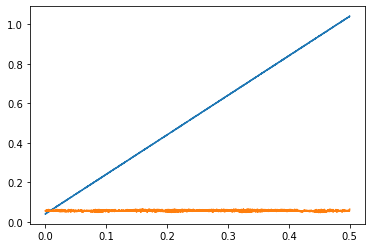

In [23]:
# Plot AI channels
DAQdata = np.asarray(data)
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
t = np.linspace(0, .5, num=fs//2)
plt.plot(t,np.transpose(DAQdata[:,0:fs//2]))
plt.show()

In [18]:
sio.savemat(filename+'_DAQ.mat', {'DAQdata': DAQdata})

In [22]:
3//2

1